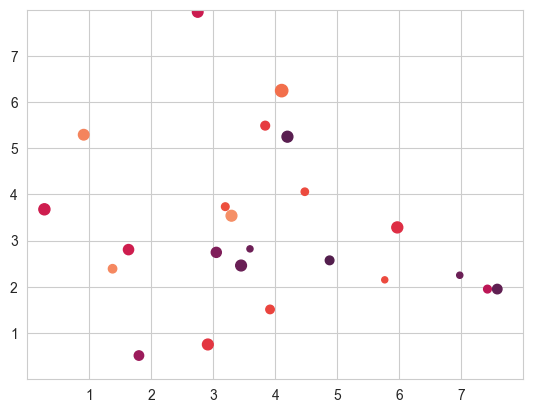

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#plt.style.use('_mpl-gallery')

# make the data
np.random.seed(3)
x = 4 + np.random.normal(0, 2, 24)
y = 4 + np.random.normal(0, 2, len(x))
# size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

# EDA

## 数据集描述

diamonds数据框包含53940行，有carat、cut、color、clarity、depth、table、price、x、y、z共10列，对应每个钻石的一些参数值。

carat：克拉，钻石的重量

cut：代表了钻石的切工，由低到高依次为Fair, Good, Very Good, Premium, Ideal

color：代表了钻石的颜色从最低的J到最高的D

clarity：钻石的纯净度,代表了钻石的透明程度从低到高依次为I1, SI1, SI2, VS1, VS2, VVS1, VVS2, IF

depth：深度比例

table：代表了钻石的桌面比例

price：代表了钻石的价格
m
x,y,z：分别代表了钻石的长/宽/高

In [45]:
import numpy as np
import pandas as pd

# 可以比较pd读excel与读CSV的效率
dia=pd.read_excel('./data/diamonds.xlsx')

df=pd.read_csv(r'./data/diamonds.csv')

In [47]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### 问题：

1、每个数据有什么特征？

3、价格和什么成正比？

2、克拉、切割、颜色、钻石的纯净度对价格的影响？

### 数据清洗与预处理

In [26]:
## 查找缺失值

pd.isnull(df).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [27]:
## 查看数据集类型

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


### 查看数据集类型，可以看到一个10x3的列表，该数据集有10列，53940条数据。Not-Null记录该列是否有空值，Dtype描述每列数据的类型。

## 各变量相关性数据分析与可视化

In [25]:
## 查看数据描述

df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


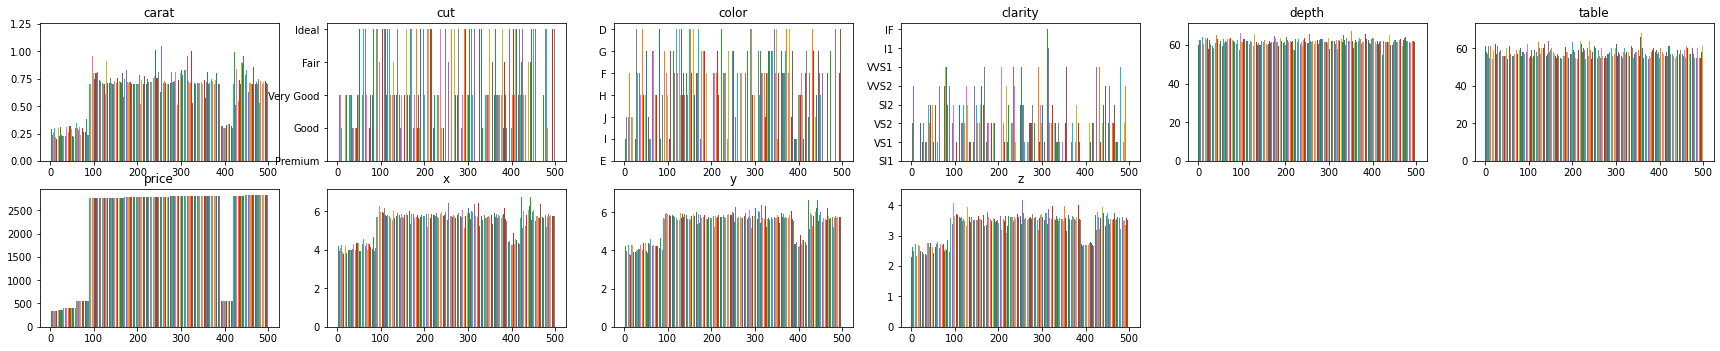

In [33]:
import matplotlib.pyplot as plt

cols=df.columns 
index=df.index[1:500]

plt.figure(figsize=(30,30))

for i in range(len(cols)):
    ax= plt.subplot(10,6,i+1)
    ax.set_title(cols[i])
    for j in range(len(index)):
        plt.bar(index[j],df.loc[index[j],cols[i]])
        
plt.show()

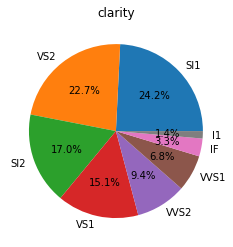

In [34]:
plt.pie(x=df['clarity'].value_counts(),
        labels=df['clarity'].value_counts().index,#水平标签
        autopct='%.1f%%')# 设置百分比格式，保留1位小数
plt.title(u'clarity')
plt.show()

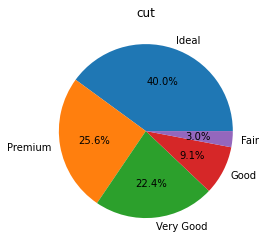

In [35]:
plt.pie(x=df['cut'].value_counts(),
        labels=df['cut'].value_counts().index,#水平标签
        autopct='%.1f%%')# 设置百分比格式，保留1位小数
plt.title(u'cut')
plt.show()

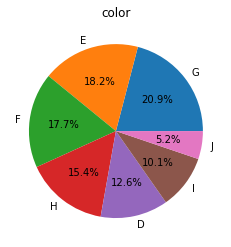

In [36]:
plt.pie(x=df['color'].value_counts(),
        labels=df['color'].value_counts().index,#水平标签
        autopct='%.1f%%')# 设置百分比格式，保留1位小数
plt.title(u'color')
plt.show()

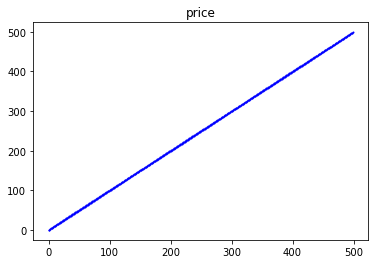

In [43]:
x=np.arange(0,500,1)
y=df['price'].index[0:500]

plt.scatter(x,y,s=1,c='b')
plt.title(u'price')
plt.show()